In [ ]:
import numpy as np
import pandas as pd

X = np.random.randn(100,1)
e = np.random.randn(100,1)

Y = 2*X + e

the_array = np.concatenate([X,Y],axis=1)

df = pd.DataFrame(the_array,columns=['X','Y'])


## Matplotlib
This is the plotting library that most if not all the plotting capabilities in Python are based one.

When used in a notebook, the plot automatically becomes interactive.

Useful to display the plots and then later save them.

The `pyplot` module is a "MATLAB like interface" for creating figures.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

### The workflow of matplotlib
Usually working with matplotlib involves these steps:
1. Creating a `figure` and `axes` object.
2. Specifying the parameters for the  `figure.`
3. Filling the figure by plotting something on the the `axes` object.
4. Specifying the parameters of the `axes.`


### What is `figure` and what is `axes`?
The figure is the environment surrounding the actual plot (legend, captions, etc.), or the "the top level container for all the plot elements."

Specify this to change the size, layout, and number of plots.

The axes is the envrionment containing the actual plot (data, ticks, labels, etc.).


<center>
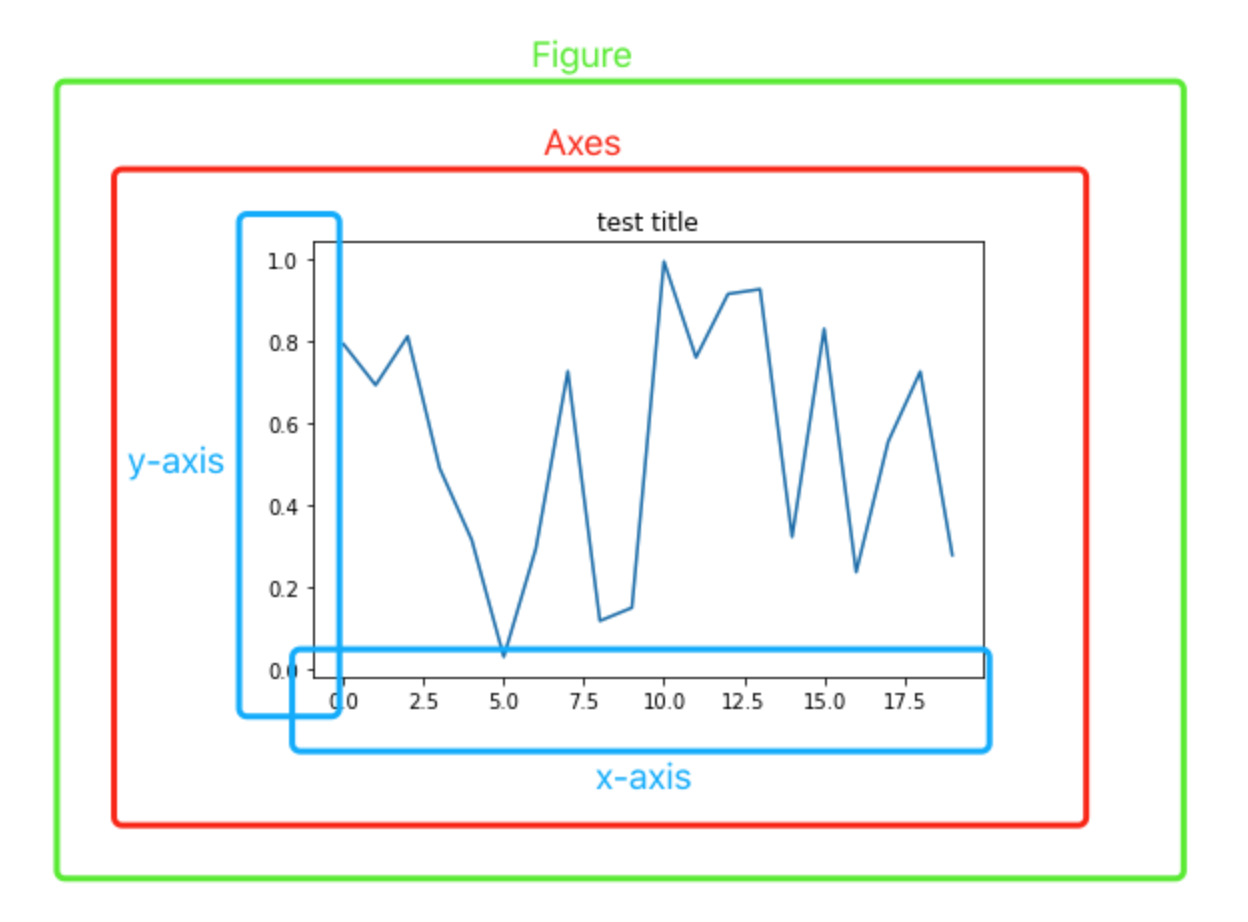
 </center>

### Two ways of doing plots:
1. The `plt` way (MATLAB style).
2. The `fig` and `axes` way (Object Oriented style).

The first one is for quick, single plots, the second way is for when you need multiple plots.

__I recommend always using the second way, but the first one is fine for single plots.__

### 1. The plt way
#### Very key concept: the "active" plot.
Matplotlib only holds one figure and axes "active" at a time.
- When you instantiate a plot, that becomes the active plot.
- If you instantiate another plot, the first plot will be gone.
- If you use `plt.show()`, it will print the active plot and nothing will be active any more.

Using `plt` always populates whatever is active.

Example:

In [ ]:
plt.plot(df['X'])

But if I were to do two calls to plt, it would populate the same graph.

In [ ]:
plt.plot(df['X']+2,color="C3")
plt.plot(df['X'])

Also works with defining attributes:

In [ ]:
plt.plot(df['X']+2,color="C3",label="X+2")
plt.plot(df['X'],label="Just X")
plt.title("Amazing Plot")
plt.xlabel("Index, I think?")
plt.ylabel("This is values of X")
plt.legend()

### Interactive vs. Scripting
- __In interactive plotting__, when I evaluate the whole cell it erases the figure from the active envrionment. When I evaluate a new call to `plt` it will start over.
- __In scripting__, you can print it out using `plt.show()`.

### What about multiple plots?
Inside just one plot, the `plt` interface is nice; it only needs to populate one place.

Where this becomes awkward is when there is more than one plot in a figure:

In [ ]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(df.X)

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(np.linspace(0,100,100));

# Label y axis
plt.ylabel("Values of X")

__Why did it only label the second pair of axes?__

Since it was the last one I created, it was the "active axes." This means all calls to `plt` go to this subplot.

I could get around this by making sure I call it twice in a certain order:


In [ ]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(df.X)
plt.ylabel("this is X") # Call it once

#create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(np.linspace(0,100,100));

plt.ylabel("this is not X") # Call it again


### 2. The `fig` and `axes` way.
In this approach, instead of relying on what is active you explicitly edit the objects you care about. This approach always starts with a call like this:

`fig, axes = plt.subplots()`

Which creates the figure and axes object separately. 

In [ ]:
fig, axes = plt.subplots(2)

The axes object is actually an array we can refer to:

In [ ]:
axes[0].plot(df.X)
axes[1].plot(np.linspace(0,100,100));

fig

Notice things stayed the same between cell calls.

We can also set labels using this interface:

In [ ]:
axes[0].set_ylabel("Just X")
axes[1].set_ylabel("Just a line")
fig

We now can be very confident what we are labeling.

More than one column of figures:

In [ ]:
fig, axes = plt.subplots(2,2) # Make a 2x2 grid of graphs
axes[0,0].plot(df.X) # Populate upper left (index 0,0)
axes[1,0].axhline(0.5) # Populate lower left (index 1,0)
axes[0,1].hist(df.X) # Populate upper right (index 0,1)

df.X.plot(kind='density',ax=axes[1,1]) # <- what's up with this one?

axes[1,1].set_ylabel("") # this gets rid of a ylabel pandas puts in

__What did I do in the last plot?__

Since there is no "density" plot built in matplotlib but there is one in Pandas, I called the Pandas one via the built in plotting method with Series and specified I wanted a density.

To put it into my figure, Pandas takes an argument called `ax` which I can specify. This way you can create plots using pandas and then stick them straight into figures where you can edit them.

#### Some functions are slightly different in the two methods.
<center>
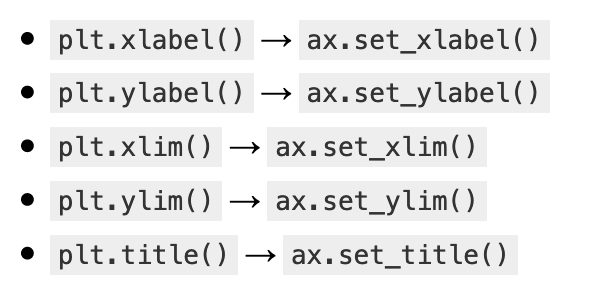
    
[source](https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html)
 </center>
 


Some major plot types:
- `scatter(x=X,y=Y)` OR `plot(X,Y,'o')`
- `hist(X,bins=nbins)`
- `plot(X,Y)`
- `bar(point,height)`

and many many others.

In [ ]:
plt.plot(X,Y,'o')

In [ ]:
plt.hist(Y,bins=20);

In [ ]:
plt.plot(np.linspace(1,100,100),\
         np.log(np.linspace(1,100,100)))
plt.savefig("example.png")

In [ ]:
plt.bar(np.linspace(0,100,100),X[:,0])


A fun one, the 2-d histogram:


In [ ]:
plt.hist2d(df.X,df.Y,bins=30,cmap="Blues");
plt.colorbar()

### Some major arguments:
- `ls` which is "line style"
- `ms` which is "marker size"
- `alpha` which controls transparency.
- `lw` which is line width.

and many others!

Unfortunately they often change with different plots, so check the documentation.

### Setting a second x-axis

In some cases we want to graph two data series in the same graph but with different y-axes.

You can accomplish this by duplicating the x-axis with `ax.twinx()` and then plotting a new series on it.

#### Example:
Same y-axis:

In [ ]:
f,a = plt.subplots()

# First plot
a.scatter(x=df.X,
          y=df.Y)
a.set_ylabel("Original Scale")

# Plot on the same x-axis
a.scatter(x=df.X+2, # Shifted x by 2
           y=df.Y+14, # Shifted y by 14
           color="green")
a.set_ylabel("Scale Slightly Moved")


Same exact graphs, but plotted on the same x-axis with two different y axes:

In [ ]:
f,a = plt.subplots()

# First plot
a.scatter(x=df.X,y=df.Y)
a.set_ylabel("Original Scale")

# Twinx
a2 = a.twinx()

# Plot on the same x-axis axis
a2.scatter(x=df.X+2, # Shifted x by 2
           y=df.Y+14, # Shifted y by 14
           color="green")
a2.set_ylabel("Scale Slightly Moved")

### Colors
- Many ways to specify colors:
<center>
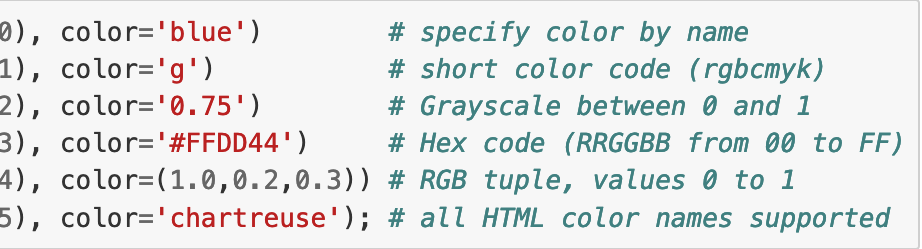
</center>
 
- Most of these functions take an argument called "cmap" if you want to use a colormap to represent another variable.
- For the plot function, you can add an argument "c" which is the variable it colors by.


In [ ]:
f,a = plt.subplots()

df['X_Neg'] = df['X']<0 # Create boolean vector

a.scatter(x=df.X,
          y=df.Y,
          c=df.X_Neg, # Variable that determines color
          cmap="RdBu", # Colormap for translating values to color
          s=20) # Size of points

a.axvline(0,color='black',ls="--") # Line at zero

Scatter plots can also use  a variable to determine size:

In [ ]:
df['X_Neg'] = df['X']<0

df['size'] = np.abs(df['Y'])**4

plt.scatter(x=df.X,
            y=df.Y,
            c=df.X_Neg, # determines color
            cmap="RdBu", # color map
            s=df['size'], # determines point size using this variable
            alpha=.8) # alpha parameter controls transparency

plt.axvline(0,ls='--',color='black')

### What are colormaps?
- Essentially functions that take values and give back color values.
- By specifying `cmap` alot of plotting functions just need a key word like above (`RdBu`).
- Can also specify your own. Why would you need to do such a thing?
    - You want to create your own "discrete colormap."
    - You want to normalize a colormap in a custom way (pick a new center point).


In [ ]:
import matplotlib.colors as pltc

Custom discrete colormap:

In [ ]:
cmap = pltc.ListedColormap(["blue","red","green","black"])

for i in range(4): # For the numbers 0 through 3
    plt.plot(np.linspace(0,1,10), # X values
             np.linspace(0,1,10)+i, # Y values, but displace them
             color=cmap(i)) # Go through each index of the above list

But here `cmap` works just like a list (takes integers). How do make it more like a function so I can feed it values of X?

This is what "norm" is for. `norm` is a function for mapping numbers to the 0,1 line.

In [ ]:
df.X.max()

In [ ]:
cmap = pltc.ListedColormap(["blue","red","green","black","yellow","pink"]) # Listed colormap like before

boundaries = [df.X.min(), -1.5, -1, 0, 1, 1.5, df.X.max()] # Using x, set the boundaries

norm = pltc.BoundaryNorm(boundaries, cmap.N) # This function uses boundaries and the 
                                             # number of colors (cmap.N)


In [ ]:
plt.scatter(x=df.X,
            y=df.Y,
            c=df['X'], # Feed X to our color argument
            cmap=cmap, # Give it our listed colormap
            s=20,
            alpha=.7,
            norm=norm) # Tell it to normalize using this

for b in boundaries: 
    plt.axvline(b,color='black',ls=':') # Draw a dashed line at each 
                                        # boundary

# plt.colorbar()

Works with other colormaps too. Using it here makes the center of the colomap 1 instead of the usual 0:

In [ ]:
norm = pltc.Normalize(vmin=-1,vmax=2) # Make a normalizing factor where 0 is the min and 2 is the max
plt.scatter(x=df.X,
            y=df.Y,
            c=df['X'],
            cmap="RdBu",
            s=20,
            alpha=.7,
            norm=norm)
plt.axvline(.5,color="black",ls="--")
plt.colorbar()

In [ ]:
# Example of making your own norm.  Also see matplotlib.colors.
# From Joe Kington: This one gives two different linear ramps:
class MidpointNormalize(pltc.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        pltc.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [ ]:
plt.scatter(x=df.X,
            y=df.Y,
            c=df['X'],
            cmap="RdBu",
            s=400,
            alpha=.4,
            norm=MidpointNormalize(midpoint=-1))
plt.colorbar()

__Whats wrong with this picture?__

<center>
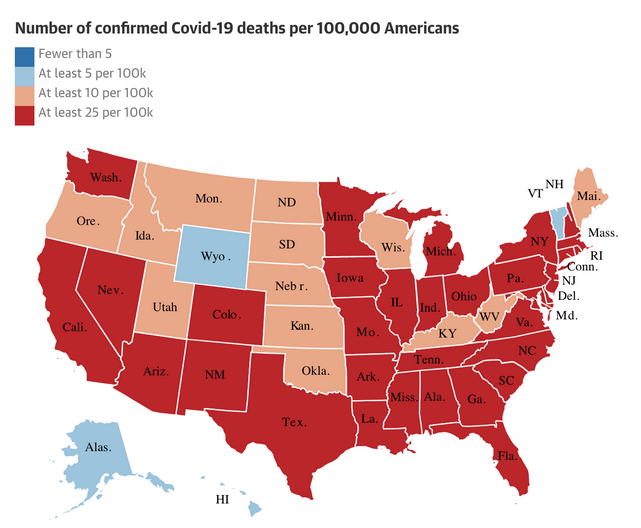
 </center>

### Problems:
- Using a diverging colormap when nothing is diverging.
- The legend entries contain each other ("at least 5" is a super set of "at least 10").
- Puts special emphasis on the number 5, which draws your attention to four specific states.

__Moral: make midpoints that make sense!__

__Use of a diverging colormap when some number (like 0) is a midpoint that is meaningful:__

<center>
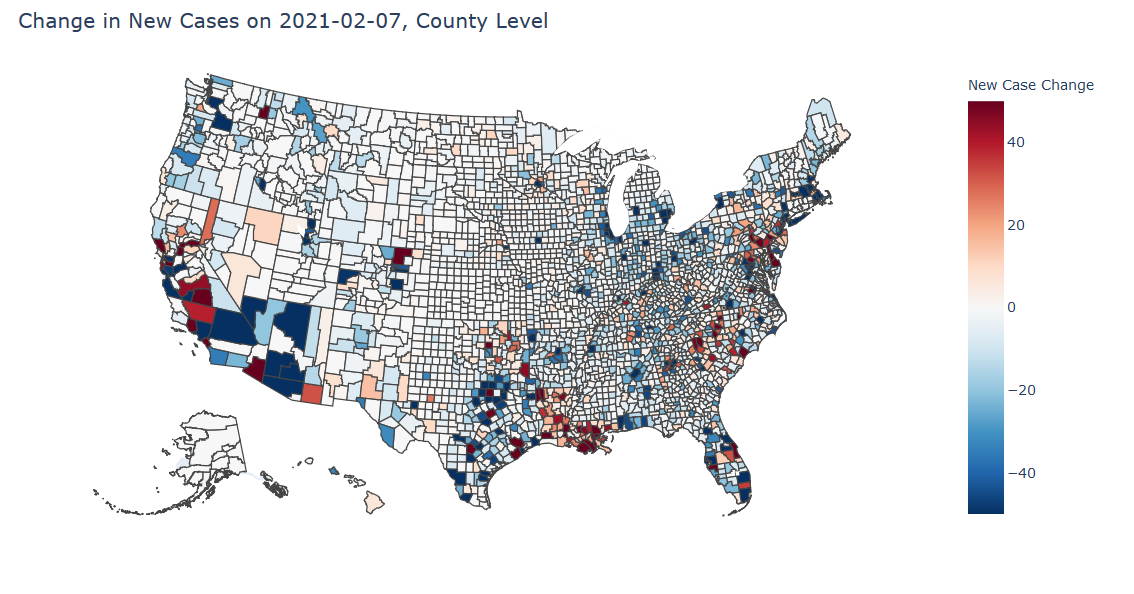
 </center>